In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [593]:
#reading the data
df = pd.read_csv('2024_operational_data.csv')
revenue = pd.read_csv('revenue_melted.csv')
df.head()

,Site_Name,Start date,End date,Avail. Time Grid,Total_Grid_Output_KWH,Usage Time Grid,Grid - Power Max [kW],Gen_On_Load_Grid_Fully_Available_Hours,Gen_On_Load_Grid_Fully_Available_Liter,Total_Solar_Output_KWH,...,Battery - Total Charge [KWH],Usage Time Battery,Usage Time Other,DG_KVA,CPH,Site_Layout,Site_ID,Vendor,Site_Region,SDS
0,Karen Rhino Park,01/01/2024,31/01/2024,734.24,3447.32,703.99,8.16,27.82,51.83,0.00,...,8.68,2.41,0.00,20.0,2.72,ONGRID_HYBRID,618307,Egypro,Lower Eastern,Solomon Mwangi
1,KMTC,01/01/2024,31/01/2024,737.21,1618.56,416.34,8.61,0.51,2.88,408.44,...,418.77,187.72,0.00,20.0,2.12,ONGRID_SOLAR,618487,I Engineering,CBD,Benson Masili
2,Nyari Estate,01/01/2024,31/01/2024,743.75,121.12,743.75,0.75,0.00,0.00,0.00,...,0.00,0.00,0.25,20.0,0.00,ONGRID_HYBRID,618411,I Engineering,upper Central,Florence Njoroge
3,Kimathi Estate,01/01/2024,31/01/2024,743.92,4588.73,627.51,12.88,0.02,0.00,554.29,...,191.54,33.65,0.00,20.0,2.42,ONGRID_HYBRID_SOLAR,618354,Netis,Nairobi East,Doris Naitore
4,Diani Exchange,01/01/2024,31/01/2024,741.14,60.50,714.48,5.13,0.05,0.00,0.00,...,6.93,28.61,0.86,15.0,1.20,ONGRID_SOLAR,618005,Netis,Coast,Festus Kioko


In [594]:
revenue.head()

,Site_ID,tenant,Anchor Tenant,Site_Layout,Month,O&M,Revenue
0,618005,Telkom Kenya Limited,Telkom Kenya Limited,Ongrid,June,"-69,508","134,899"
1,618007,Telkom Kenya Limited,Telkom Kenya Limited,Ongrid,June,"-45,880","134,899"
2,618009,Telkom Kenya Limited,Telkom Kenya Limited,Offgrid,June,"31,629",-
3,618010,Telkom Kenya Limited,Telkom Kenya Limited,Ongrid,June,"-273,090","132,420"
4,618011,Jamii Telecommunications Ltd,Jamii Telecommunications Ltd,Ongrid,June,"-63,500","501,830"


In [595]:
revenue.isnull().sum()

Site_ID            0
tenant           648
Anchor Tenant    432
Site_Layout      444
Month              0
O&M                0
Revenue          974
dtype: int64

In [596]:
#function to extract the outliers using the IQR
cols = ['Battery - Total Discharge [KWH]', 'Battery - Total Charge [KWH]']
def replace_outliers_with_median(df):
    # Identify numerical columns
    df_cleaned = df.copy()  # Create a copy to avoid modifying the original DataFrame

    for col in cols:
        lower_quartile = df[col].quantile(0.25)
        upper_quartile = df[col].quantile(0.75)
        IQR = upper_quartile - lower_quartile
        lower_bound = lower_quartile - 1.5 * IQR
        upper_bound = upper_quartile + 1.5 * IQR
        
        # Compute the median of the column
        median_value = df[col].median()
        
        # Replace outliers with the median
        df_cleaned[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    return df_cleaned

In [597]:
df_cleaned = replace_outliers_with_median(df)
df = df_cleaned.copy()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avail. Time Grid,50508.0,545.422562,281.547558,0.0,545.6100,693.6450,720.7900,744.00
Total_Grid_Output_KWH,50508.0,2177.022612,2644.318343,0.0,92.6875,1748.2450,2809.5375,40249.16
Usage Time Grid,50508.0,389.690890,233.658553,0.0,269.5500,433.0000,566.9325,744.00
Grid - Power Max [kW],50508.0,9.721376,8.612674,0.0,4.0375,9.9800,12.6000,99.74
Gen_On_Load_Grid_Fully_Available_Hours,50508.0,4.793844,17.590065,0.0,0.0000,0.1600,2.2600,480.55
Gen_On_Load_Grid_Fully_Available_Liter,50508.0,15.766439,108.702078,0.0,0.0000,0.0000,5.4500,9703.32
Total_Solar_Output_KWH,50508.0,512.041345,380.142644,0.0,114.1950,551.8350,778.9850,6810.92
Avail. Time Solar,50508.0,251.243670,140.370668,0.0,240.7175,318.5900,344.3500,743.95
Usage Time Solar,50508.0,112.004844,84.562837,0.0,35.9050,111.7100,178.8525,555.01
Solar_On_Load_No_Battery_Charge_Hours,50508.0,5.153315,19.828899,0.0,0.0000,0.1800,1.7000,356.23


In [598]:
def clean_df(df,revenue):
    revenue.dropna(subset=['Revenue'], inplace=True)
    revenue['Revenue'] = revenue['Revenue'].str.replace(',', '', regex=True)
    revenue['Revenue'] = pd.to_numeric(revenue['Revenue'], errors='coerce')
    revenue.dropna(subset=['Revenue'], inplace=True)
    revenue = revenue[revenue['Revenue'] > 0].copy()
    revenue['Site_ID'] = revenue['Site_ID'].astype(str)
    revenue['ID_Month'] = revenue['Site_ID'] + '_' + revenue['Month']
    revenue_id = revenue[['ID_Month', 'Revenue']]
    revenue_id = revenue_id.drop_duplicates(subset=['ID_Month'])
    df['End date'] = pd.to_datetime(df['End date'],dayfirst=True)
    df['Month'] = df['End date'].dt.month_name()
    df['Site_ID'] = df['Site_ID'].astype(str)
    df['ID_Month'] = df['Site_ID'] + '_' + df['Month']
    df['Quarter'] = df['End date'].dt.quarter
    df['Quarter'] = df['Quarter'].map({1:'Q1',2:'Q2',3:'Q3',4:'Q4'})
    df['Site_Layout'] = df['Site_Layout'].str.replace('INDOOR_','')
    df = df[df['Site_Layout'] != 'OFFGRID']
    df = df.drop_duplicates(subset=['ID_Month'])
    cost_data = pd.merge(df, revenue_id, on='ID_Month', how='inner')
    cost_data = cost_data.drop_duplicates()
    cost_data['Opex_Factor_kWh'] =  (cost_data['Total_Solar_Output_KWH'] + cost_data['Battery - Total Discharge [KWH]']) - cost_data['Total_Generator_Output_KWH']
    cost_data['Power_Loss'] =  (cost_data['Total_Grid_Output_KWH'] + cost_data['Total_Solar_Output_KWH'] + cost_data['Battery - Total Discharge [KWH]'] + cost_data['Total_Generator_Output_KWH']) - cost_data['Total_Consumers_Load_KWH'] 
    cost_data['Total_Grid_Cost'] = cost_data['Total_Grid_Output_KWH'] * 27 
    cost_data['Total_Solar_Saving'] = cost_data['Total_Solar_Output_KWH'] * 18
    cost_data['Total_Gen_Cost'] = cost_data['Total_Generator_Output_KWH'] * 54
    cost_data['Total_operational_Cost'] =cost_data['Total_Grid_Cost'] + cost_data['Total_Gen_Cost']
    cost_data['Cost_Margin'] = cost_data['Revenue'] - (cost_data['Total_Grid_Cost'] + cost_data['Total_Gen_Cost'])
    cost_data = cost_data[(cost_data['Revenue'] > 0)]
    return cost_data
#clean_df(df,revenue)

In [599]:
def rename_cols(df):
    df.columns = (
        df.columns
        .str.replace('.', '', regex=False)
        .str.replace('-', '', regex=False)
        .str.replace('  ', '_', regex=False)
        .str.replace(' ', '_', regex=False)
        .str.replace('[', '', regex=False)
        .str.replace(']', '', regex=False)
    )
    return df

In [600]:
df = clean_df(df,revenue)
df = rename_cols(df)

In [601]:
def capitalize(text):
    return ' '.join([word.capitalize() for word in text.split()])

df['Site_Region'] = df['Site_Region'].str.strip().apply(capitalize)
df['Vendor'] = df['Vendor'].str.strip().apply(capitalize)

In [602]:
df.head()

,Site_Name,Start_date,End_date,Avail_Time_Grid,Total_Grid_Output_KWH,Usage_Time_Grid,Grid_Power_Max_kW,Gen_On_Load_Grid_Fully_Available_Hours,Gen_On_Load_Grid_Fully_Available_Liter,Total_Solar_Output_KWH,...,ID_Month,Quarter,Revenue,Opex_Factor_kWh,Power_Loss,Total_Grid_Cost,Total_Solar_Saving,Total_Gen_Cost,Total_operational_Cost,Cost_Margin
0,Peponi Rd,01/06/2024,2024-06-30,701.63,78.96,701.63,4.49,0.00,0.00,0.00,...,618332_June,Q2,132420.0,0.00,78.96,2131.92,0.00,0.00,2131.92,130288.08
1,Muringa Road,01/06/2024,2024-06-30,694.06,43.45,694.06,3.50,0.00,0.00,0.00,...,618468_June,Q2,132420.0,0.00,43.45,1173.15,0.00,0.00,1173.15,131246.85
2,Kathyaka,01/06/2024,2024-06-30,701.51,3451.02,530.35,12.50,0.44,1.11,649.24,...,619015_June,Q2,764744.0,940.79,402.91,93177.54,11686.32,4160.16,97337.70,667406.30
3,Diani Exchange,01/06/2024,2024-06-30,718.16,28.45,657.38,5.01,0.06,0.00,2.99,...,618005_June,Q2,134899.0,3.29,-75.28,768.15,53.82,3.24,771.39,134127.61
4,Ndi Tsavo,01/06/2024,2024-06-30,0.00,0.00,0.00,0.00,0.00,0.00,506.01,...,618289_June,Q2,461500.0,219.61,960.84,0.00,9108.18,63195.66,63195.66,398304.34


In [603]:
df.isnull().sum()

Site_Name                                 0
Start_date                                0
End_date                                  0
Avail_Time_Grid                           0
Total_Grid_Output_KWH                     0
Usage_Time_Grid                           0
Grid_Power_Max_kW                         0
Gen_On_Load_Grid_Fully_Available_Hours    0
Gen_On_Load_Grid_Fully_Available_Liter    0
Total_Solar_Output_KWH                    0
Avail_Time_Solar                          0
Usage_Time_Solar                          0
Solar_On_Load_No_Battery_Charge_Hours     0
Solar_Capacity_KWP                        0
Avail_Time_Generator_1                    0
Usage_Time_Generator_1                    0
Total_Generator_Output_KWH                0
Gen_On_Load_No_Battery_Charge_Hours       0
Gen_On_Load_No_Battery_Charge_Liter       0
DG_Run_Hours                              0
Monthly_Operational_Fuel                  0
Total_Fuel_Drops                          0
Average_Consumers_Load_KW       

In [604]:
df.nunique()

Site_Name                                  818
Start_date                                   3
End_date                                     3
Avail_Time_Grid                           1535
Total_Grid_Output_KWH                     1699
Usage_Time_Grid                           1704
Grid_Power_Max_kW                         1022
Gen_On_Load_Grid_Fully_Available_Hours     542
Gen_On_Load_Grid_Fully_Available_Liter     585
Total_Solar_Output_KWH                    1719
Avail_Time_Solar                          1580
Usage_Time_Solar                          1691
Solar_On_Load_No_Battery_Charge_Hours      603
Solar_Capacity_KWP                          89
Avail_Time_Generator_1                    1306
Usage_Time_Generator_1                    1293
Total_Generator_Output_KWH                1439
Gen_On_Load_No_Battery_Charge_Hours        812
Gen_On_Load_No_Battery_Charge_Liter        758
DG_Run_Hours                              1309
Monthly_Operational_Fuel                  1550
Total_Fuel_Dr

In [605]:
print(df['Revenue'].min())

20483.0


In [606]:
#df.to_csv('profit_margins.csv',index=False)

In [607]:
#creating a list for categorical and numericals variables
cat_cols = [col for col in df.columns if df[col].dtype=='object' and col not in ['Site_Name','Site_ID', 'ID_Month','Start_date','End_date']]

In [608]:
len(cat_cols)

6

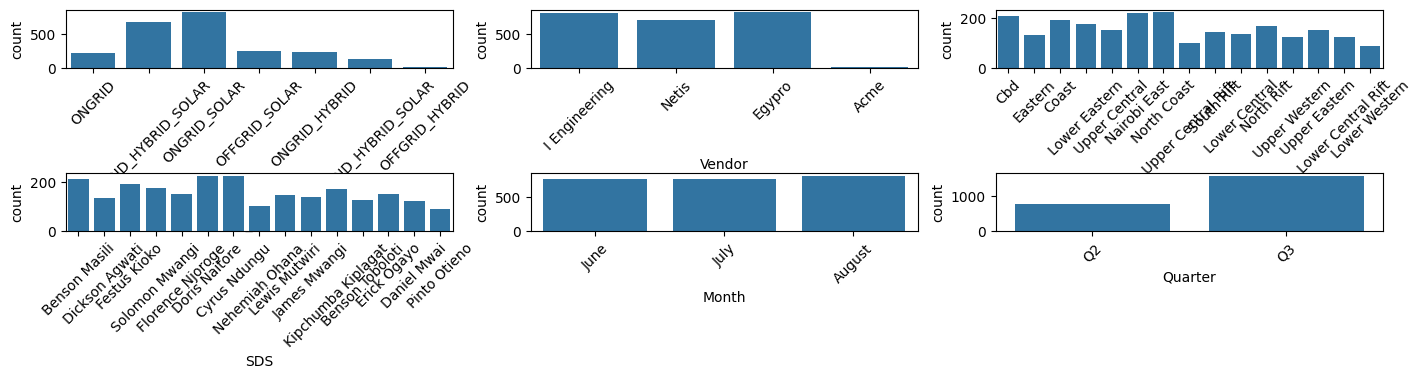

In [348]:
#Checking the distribution of categorical variables (count of each category)
fig = plt.figure(figsize=(17,5))
for i,col in enumerate(cat_cols):
    if col not in ['Site_ID', 'ID_Month']:
        plt.subplot(3,3,i+1)
        sns.countplot(x=df[col])
        plt.xticks(rotation=45)
plt.subplots_adjust(hspace=1.8)

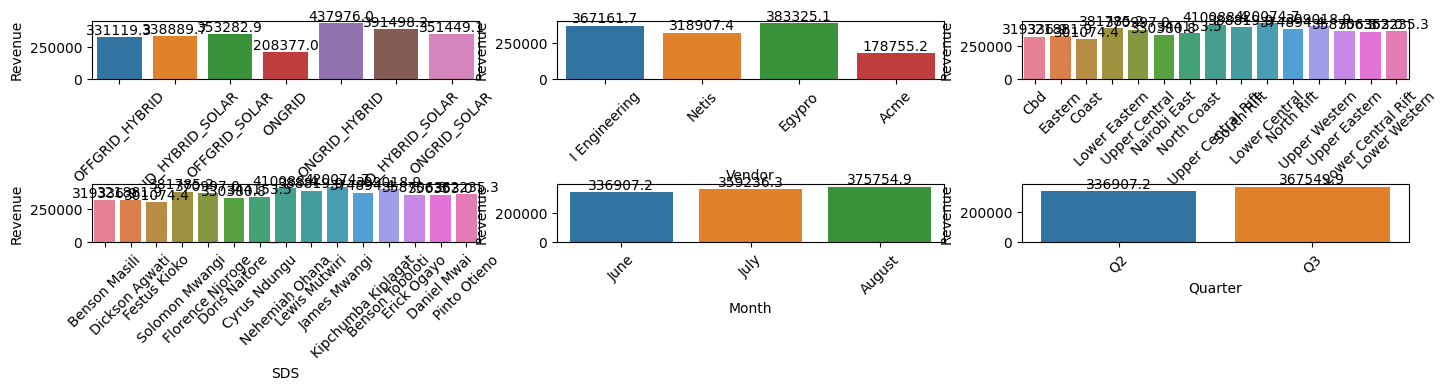

In [525]:
#Checking the distribution of Cost_Margin across the categorical variables
fig = plt.figure(figsize=(17,5))
for i,col in enumerate(cat_cols):
    if col not in ['Site_ID', 'ID_Month']:
        plt.subplot(3,3,i+1)
        ax = sns.barplot(x=col, y='Revenue', data=df, hue=col, errorbar=None)
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
        plt.xticks(rotation=45)
plt.subplots_adjust(hspace=1.8)

In [609]:
num_cols = [col for col in df.columns if df[col].dtype !='object' and col not in ['End_date']]
def test_skewness(df):
    from scipy import stats
    for col in num_cols:
        skewness = stats.skew(df[col])
        if skewness < -1 or skewness > 1:
            print(f"{col} is Skewed ({skewness:.2f})")
        else:
            print(f"{col} is not Skewed ({skewness:.2f})")

In [610]:
test_skewness(df)

Avail_Time_Grid is not Skewed (-0.89)
Total_Grid_Output_KWH is Skewed (5.03)
Usage_Time_Grid is not Skewed (-0.29)
Grid_Power_Max_kW is Skewed (3.23)
Gen_On_Load_Grid_Fully_Available_Hours is Skewed (11.86)
Gen_On_Load_Grid_Fully_Available_Liter is Skewed (31.42)
Total_Solar_Output_KWH is not Skewed (0.55)
Avail_Time_Solar is not Skewed (-0.80)
Usage_Time_Solar is not Skewed (0.56)
Solar_On_Load_No_Battery_Charge_Hours is Skewed (7.25)
Solar_Capacity_KWP is not Skewed (-0.20)
Avail_Time_Generator_1 is Skewed (2.55)
Usage_Time_Generator_1 is Skewed (2.55)
Total_Generator_Output_KWH is Skewed (3.34)
Gen_On_Load_No_Battery_Charge_Hours is Skewed (5.69)
Gen_On_Load_No_Battery_Charge_Liter is Skewed (41.72)
DG_Run_Hours is Skewed (2.55)
Monthly_Operational_Fuel is Skewed (15.63)
Total_Fuel_Drops is Skewed (31.55)
Average_Consumers_Load_KW is not Skewed (0.71)
Total_Consumers_Load_KWH is not Skewed (0.71)
Battery_Total_Discharge_KWH is Skewed (1.04)
Battery_Total_Charge_KWH is Skewed (1.05)


In [352]:
def plot_box_plot(df):
    plt.figure(figsize=(15,10))
    for i,val in enumerate(num_cols):
        plt.subplot(6,6,i+1)
        sns.boxplot(x=val,data=df)
        plt.title(f'{val}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

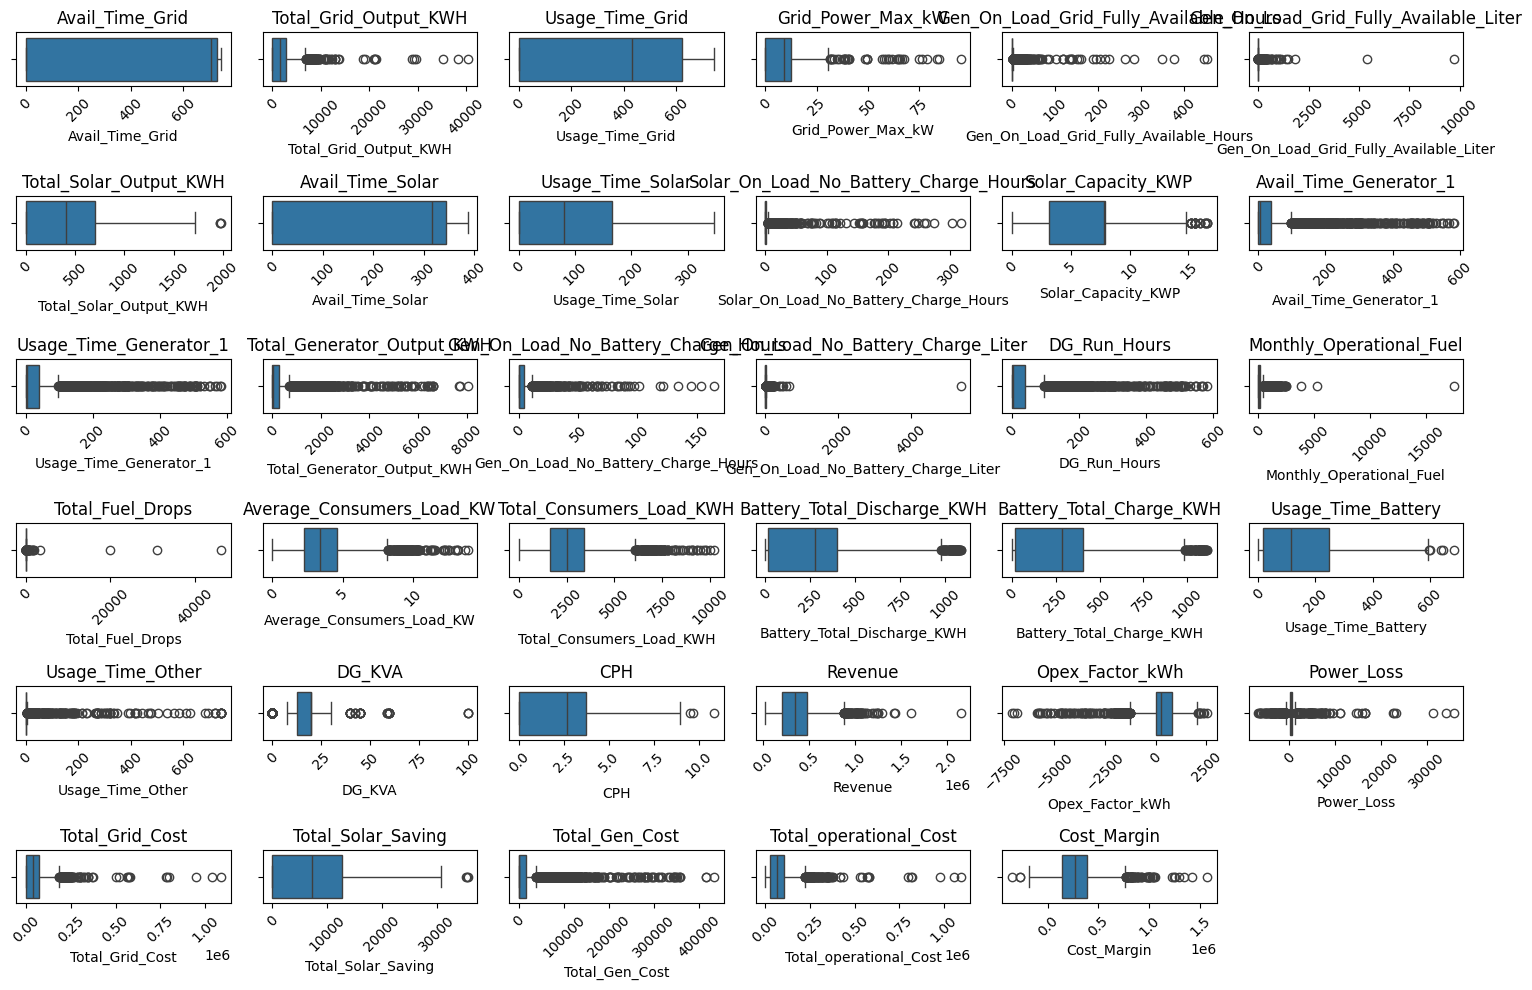

In [353]:
plot_box_plot(df)

In [611]:
#function to extract the outliers using the IQR
def extract_outliers(df):
    outliers_dict = {}
    
    for col in num_cols:
        lower_quartile = df[col].quantile(0.25)
        upper_quartile = df[col].quantile(0.75)
        IQR = upper_quartile - lower_quartile
        lower_bound = lower_quartile - 1.5 * IQR
        upper_bound = upper_quartile + 1.5 * IQR
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = outliers_in_col
        #print(f"Outliers in {col}:")
        #print(outliers_in_col)
        #print(f"Number of outliers in {col}: {len(outliers_in_col)}\n")
    
    return outliers_dict

In [612]:
outliers_data = extract_outliers(df)
revenue_outliers = outliers_data['Revenue']

In [613]:
revenue_outliers

,Site_Name,Start_date,End_date,Avail_Time_Grid,Total_Grid_Output_KWH,Usage_Time_Grid,Grid_Power_Max_kW,Gen_On_Load_Grid_Fully_Available_Hours,Gen_On_Load_Grid_Fully_Available_Liter,Total_Solar_Output_KWH,...,ID_Month,Quarter,Revenue,Opex_Factor_kWh,Power_Loss,Total_Grid_Cost,Total_Solar_Saving,Total_Gen_Cost,Total_operational_Cost,Cost_Margin
48,Mt Kulal,01/06/2024,2024-06-30,0.00,0.00,0.00,0.00,0.00,0.00,1034.17,...,618689_June,Q2,889056.0,-1948.37,577.51,0.00,18615.06,177359.76,177359.76,711696.24
76,KSM Nyamasaria,01/06/2024,2024-06-30,704.82,6224.94,628.04,15.47,4.58,15.64,766.02,...,618133_June,Q2,959626.0,711.95,153.50,168073.38,13788.36,3359.88,171433.26,788192.74
189,"Karatina BSC, E",01/06/2024,2024-06-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,619329_June,Q2,1239789.0,0.00,0.00,0.00,0.00,0.00,0.00,1239789.00
296,Kisumu Migosi,01/06/2024,2024-06-30,645.45,5204.09,553.07,14.07,1.21,1.25,686.21,...,619790_June,Q2,882833.0,366.09,663.22,140510.43,12351.78,31889.70,172400.13,710432.87
297,Nairobi Runda,01/06/2024,2024-06-30,676.21,3266.74,675.28,6.86,0.61,0.91,0.00,...,619117_June,Q2,878667.0,-411.13,-2911.67,88201.98,0.00,22928.94,111130.92,767536.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,Gilgil,01/08/2024,2024-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,619411_August,Q3,1041246.0,0.00,0.00,0.00,0.00,0.00,0.00,1041246.00
2329,Kaptola ATC,01/08/2024,2024-08-31,728.08,1876.88,564.93,7.58,0.68,1.14,539.56,...,622628_August,Q3,1023736.0,560.73,132.65,50675.76,9712.08,104.76,50780.52,972955.48
2332,Bumula Town,01/08/2024,2024-08-31,720.48,2261.05,619.04,6.96,13.87,31.88,0.00,...,622791_August,Q3,881739.0,147.55,410.98,61048.35,0.00,6987.06,68035.41,813703.59
2336,Nairobi Uthiru,01/08/2024,2024-08-31,734.59,4263.96,628.99,10.64,0.07,0.00,484.71,...,619957_August,Q3,909774.0,632.08,307.30,115126.92,8724.78,908.82,116035.74,793738.26


In [528]:
#checking the distribution of each numerical variable
def plot_num_distribution(df):
    fig = plt.figure(figsize=(15,10))
    for i,col in enumerate(num_cols):
        plt.subplot(6,6,i+1)
        sns.histplot(df[col],kde=True)
        plt.title(f'{col}')
        plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=1.8)

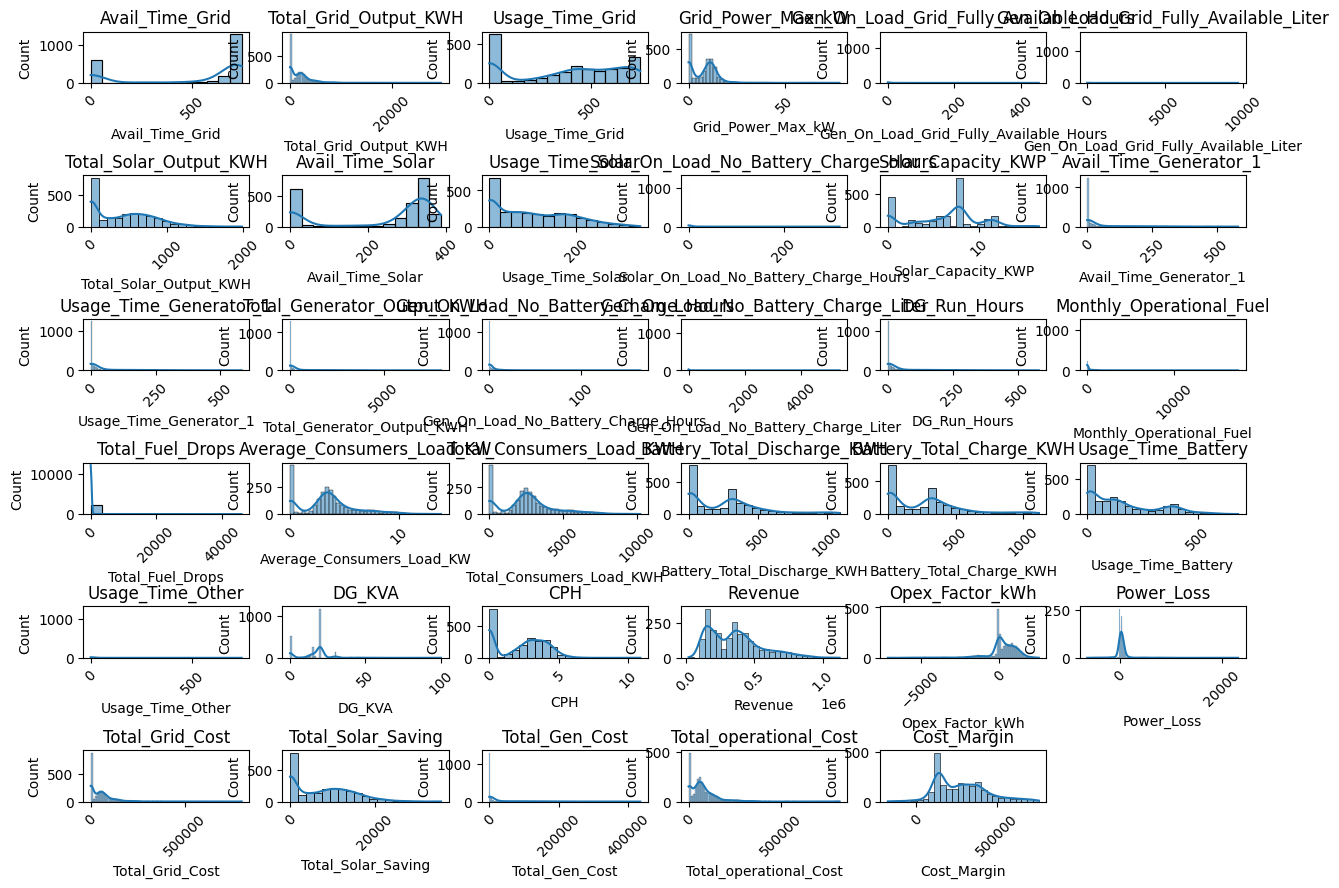

In [529]:
plot_num_distribution(df)

In [614]:
df = df[~df['Revenue'].isin(revenue_outliers['Revenue'])]
#df_outliers.to_csv('outliers.csv',index = False)

In [615]:
print(df['Revenue'].min())
print(df['Revenue'].max())

20483.0
877149.0


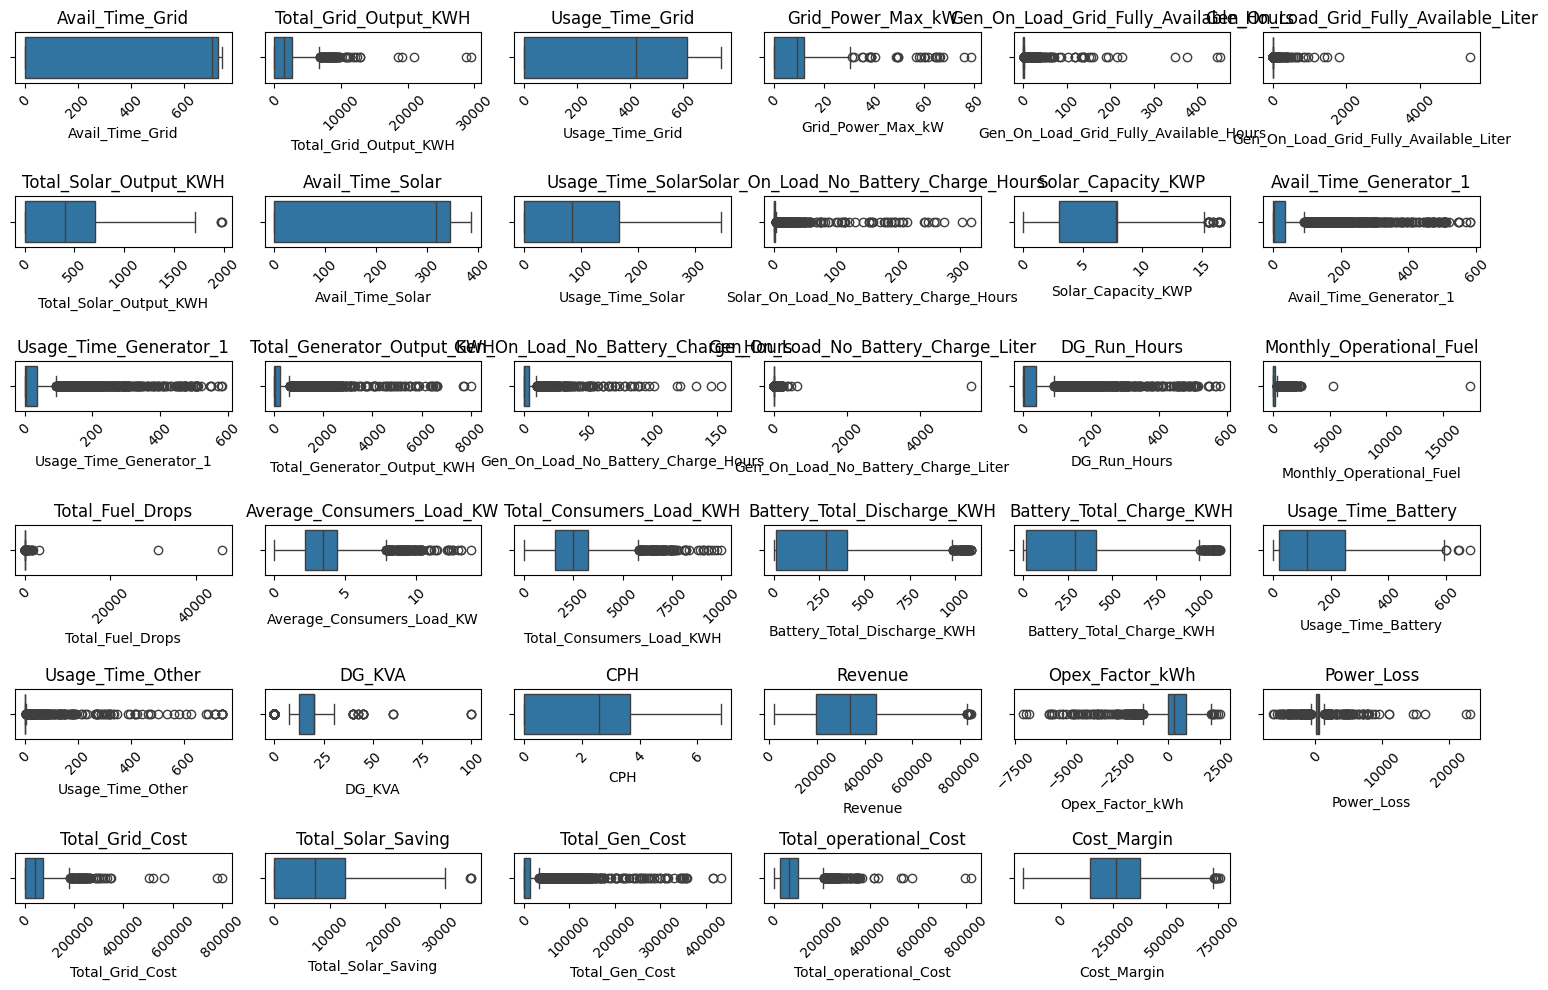

In [534]:
plot_box_plot(df)

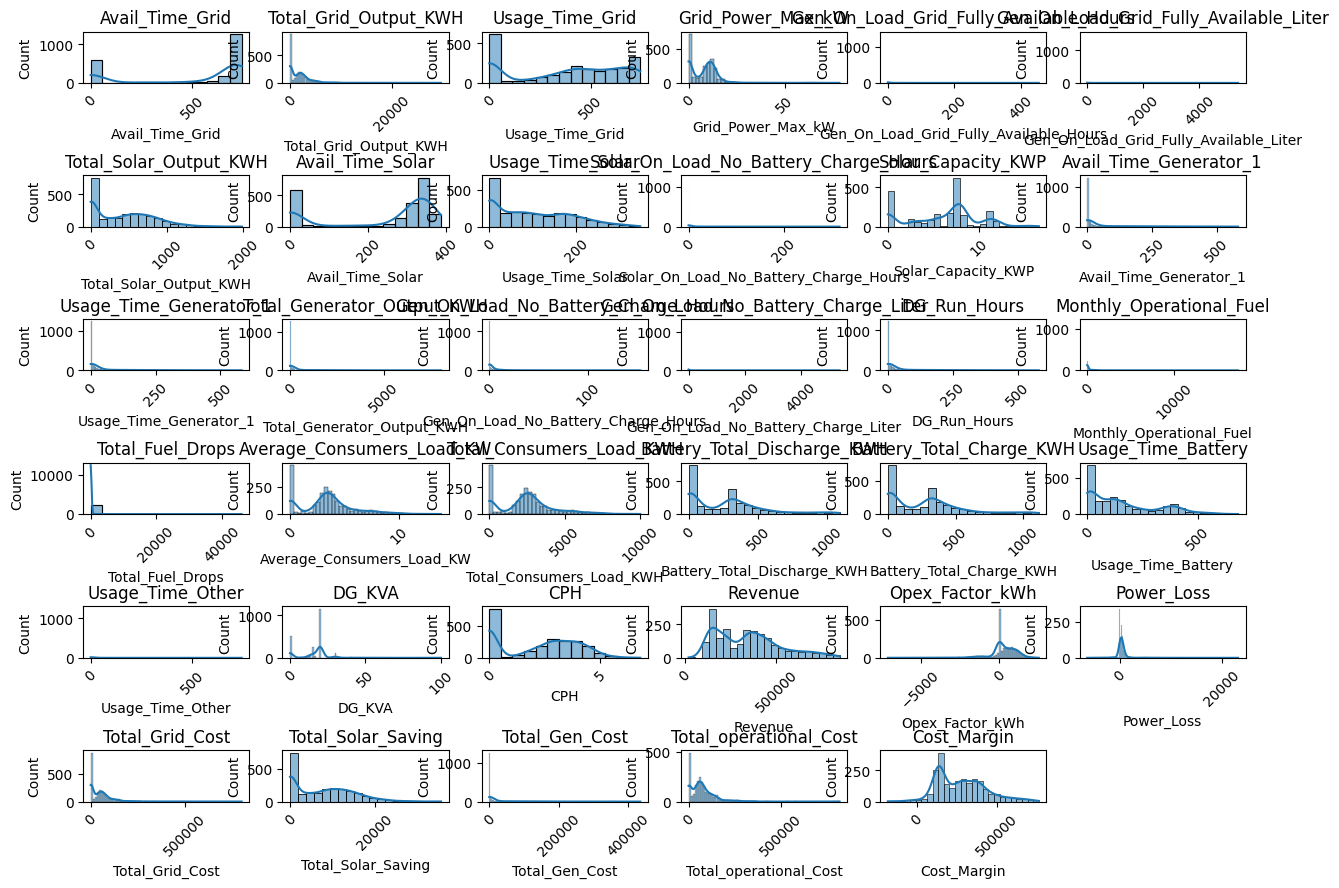

In [535]:
#checking for the distribution after outliers removal
plot_num_distribution(df)

In [616]:
#checking for skewness after outliers removal
test_skewness(df)

Avail_Time_Grid is not Skewed (-0.89)
Total_Grid_Output_KWH is Skewed (5.53)
Usage_Time_Grid is not Skewed (-0.27)
Grid_Power_Max_kW is Skewed (3.37)
Gen_On_Load_Grid_Fully_Available_Hours is Skewed (12.02)
Gen_On_Load_Grid_Fully_Available_Liter is Skewed (25.81)
Total_Solar_Output_KWH is not Skewed (0.55)
Avail_Time_Solar is not Skewed (-0.82)
Usage_Time_Solar is not Skewed (0.54)
Solar_On_Load_No_Battery_Charge_Hours is Skewed (7.11)
Solar_Capacity_KWP is not Skewed (-0.19)
Avail_Time_Generator_1 is Skewed (2.59)
Usage_Time_Generator_1 is Skewed (2.59)
Total_Generator_Output_KWH is Skewed (3.36)
Gen_On_Load_No_Battery_Charge_Hours is Skewed (5.62)
Gen_On_Load_No_Battery_Charge_Liter is Skewed (42.16)
DG_Run_Hours is Skewed (2.58)
Monthly_Operational_Fuel is Skewed (16.26)
Total_Fuel_Drops is Skewed (34.85)
Average_Consumers_Load_KW is not Skewed (0.66)
Total_Consumers_Load_KWH is not Skewed (0.66)
Battery_Total_Discharge_KWH is Skewed (1.01)
Battery_Total_Charge_KWH is Skewed (1.03)


In [617]:
from scipy import stats
def normal_test(df):
    for col in num_cols:
        stat, p = stats.normaltest(df[col])
        if p < 0.05:
            print(f"{col} distribution is not Normal")
        else:
            print(f"{col} distribution is normal")

In [618]:
#checking for normality after outliers removal
normal_test(df)

Avail_Time_Grid distribution is not Normal
Total_Grid_Output_KWH distribution is not Normal
Usage_Time_Grid distribution is not Normal
Grid_Power_Max_kW distribution is not Normal
Gen_On_Load_Grid_Fully_Available_Hours distribution is not Normal
Gen_On_Load_Grid_Fully_Available_Liter distribution is not Normal
Total_Solar_Output_KWH distribution is not Normal
Avail_Time_Solar distribution is not Normal
Usage_Time_Solar distribution is not Normal
Solar_On_Load_No_Battery_Charge_Hours distribution is not Normal
Solar_Capacity_KWP distribution is not Normal
Avail_Time_Generator_1 distribution is not Normal
Usage_Time_Generator_1 distribution is not Normal
Total_Generator_Output_KWH distribution is not Normal
Gen_On_Load_No_Battery_Charge_Hours distribution is not Normal
Gen_On_Load_No_Battery_Charge_Liter distribution is not Normal
DG_Run_Hours distribution is not Normal
Monthly_Operational_Fuel distribution is not Normal
Total_Fuel_Drops distribution is not Normal
Average_Consumers_Load_

In [619]:
def levene_test(df):
    for col in cat_cols:
        if col not in ['ID_Month','SDS']:
            groups = [group['Revenue'].values for _, group in df.groupby(col,observed=True)]
            stat, p = stats.levene(*groups)
            if p < 0.05:
                print(f"Levene's Test: Variances of Revenue are significantly different across the {col} (Reject H0)")
            else:
                print(f"Levene's Test: Variances of Revenue are equal across the {col} (Fail to reject H0)")

In [620]:
levene_test(df)

Levene's Test: Variances of Revenue are significantly different across the Site_Layout (Reject H0)
Levene's Test: Variances of Revenue are significantly different across the Vendor (Reject H0)
Levene's Test: Variances of Revenue are significantly different across the Site_Region (Reject H0)
Levene's Test: Variances of Revenue are significantly different across the Month (Reject H0)
Levene's Test: Variances of Revenue are significantly different across the Quarter (Reject H0)


In [553]:
df_transformed = df.copy()
for col in num_cols:
    if col not in ['Cost_Margin','Opex_Factor_kWh','Power_Loss']:
        if (df_transformed[col] <= 0).any():
            df_transformed[col] = np.log(df_transformed[col] + 1)
        else:
            df_transformed[col] = np.log(df_transformed[col])

In [556]:
df_transformed.head()

,Site_Name,Start_date,End_date,Avail_Time_Grid,Total_Grid_Output_KWH,Usage_Time_Grid,Grid_Power_Max_kW,Gen_On_Load_Grid_Fully_Available_Hours,Gen_On_Load_Grid_Fully_Available_Liter,Total_Solar_Output_KWH,...,ID_Month,Quarter,Revenue,Opex_Factor_kWh,Power_Loss,Total_Grid_Cost,Total_Solar_Saving,Total_Gen_Cost,Total_operational_Cost,Cost_Margin
0,Peponi Rd,01/06/2024,2024-06-30,6.554830,4.381527,6.554830,1.702928,0.000000,0.000000,0.000000,...,618332_June,Q2,11.793734,0.00,78.96,7.665247,0.000000,0.000000,7.665247,130288.08
1,Muringa Road,01/06/2024,2024-06-30,6.543998,3.794365,6.543998,1.504077,0.000000,0.000000,0.000000,...,618468_June,Q2,11.793734,0.00,43.45,7.068300,0.000000,0.000000,7.068300,131246.85
2,Kathyaka,01/06/2024,2024-06-30,6.554660,8.146715,6.275421,2.602690,0.364643,0.746688,6.477342,...,619015_June,Q2,13.547296,940.79,402.91,11.442273,9.366260,8.333549,11.485952,667406.30
3,Diani Exchange,01/06/2024,2024-06-30,6.578084,3.382694,6.489782,1.793425,0.058269,0.000000,1.383791,...,618005_June,Q2,11.812282,3.29,-75.28,6.645286,4.004055,1.444563,6.649490,134127.61
4,Ndi Tsavo,01/06/2024,2024-06-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.228531,...,618289_June,Q2,13.042237,219.61,960.84,0.000000,9.117038,11.054007,11.054007,398304.34


In [554]:
#checking for normality on the transformed df
normal_test(df_transformed)

Avail_Time_Grid distribution is not Normal
Total_Grid_Output_KWH distribution is not Normal
Usage_Time_Grid distribution is not Normal
Grid_Power_Max_kW distribution is not Normal
Gen_On_Load_Grid_Fully_Available_Hours distribution is not Normal
Gen_On_Load_Grid_Fully_Available_Liter distribution is not Normal
Total_Solar_Output_KWH distribution is not Normal
Avail_Time_Solar distribution is not Normal
Usage_Time_Solar distribution is not Normal
Solar_On_Load_No_Battery_Charge_Hours distribution is not Normal
Solar_Capacity_KWP distribution is not Normal
Avail_Time_Generator_1 distribution is not Normal
Usage_Time_Generator_1 distribution is not Normal
Total_Generator_Output_KWH distribution is not Normal
Gen_On_Load_No_Battery_Charge_Hours distribution is not Normal
Gen_On_Load_No_Battery_Charge_Liter distribution is not Normal
DG_Run_Hours distribution is not Normal
Monthly_Operational_Fuel distribution is not Normal
Total_Fuel_Drops distribution is not Normal
Average_Consumers_Load_

In [559]:
#checking for variance on the transformed df
levene_test(df_transformed)

Levene's Test: Variances of Revenue are significantly different across the Site_Layout (Reject H0)
Levene's Test: Variances of Revenue are significantly different across the Vendor (Reject H0)
Levene's Test: Variances of Revenue are significantly different across the Site_Region (Reject H0)
Levene's Test: Variances of Revenue are significantly different across the Month (Reject H0)
Levene's Test: Variances of Revenue are significantly different across the Quarter (Reject H0)


# performing Priori power analysis to determine the sample size needed

In [560]:
from statsmodels.stats.power import FTestAnovaPower

# Define parameters
effect_size = 0.5  # Small to medium effect size (Cohen's f)
alpha = 0.05       # Significance level
power = 0.85      # Desired power (95%)
k = 15             # Number of groups

# Compute required sample size
analysis = FTestAnovaPower()
required_n = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, k_groups=k)

print(f"Required total sample size: {round(required_n)}")

Required total sample size: 94


# Even after transformation, the distribution of Revenue data is still not normal. the variance of Revenue across different groups is also not equal
# for that reason, we will use both welche Anova and parametric ANOVA and compare results

In [628]:
#performing parametric Anova
import scipy.stats as stats
from statsmodels.stats.power import FTestAnovaPower

def perform_anova(df,variable):
    unique_groups = df[variable].unique()
    margin_groups = [df[df[variable] == unique_group]['Revenue'] for unique_group in unique_groups]
    stat2, p2 = stats.f_oneway(*margin_groups)
    if p2 < 0.05:
        print(f"ANOVA result: p-value = {p2}. There are significant differences between {variable}s")
    else:
        print(f"ANOVA result: p-value = {p2}. There are no significant differences between {variable}s")

In [629]:
perform_anova(df,'Site_Region')

ANOVA result: p-value = 6.24725273894335e-07. There are significant differences between Site_Regions


In [630]:
alpha = 0.05
unique_groups = df['Site_Region'].unique()
margin_groups = [df[df['Site_Region'] == unique_group]['Revenue'] for unique_group in unique_groups]
sample_size = min([len(group) for group in margin_groups])
num_groups = len(margin_groups)

def compute_cohens_f(groups):
    group_means = np.array([np.mean(group) for group in margin_groups])
    grand_mean = np.mean(np.concatenate(margin_groups))
    s_between = np.sum((group_means - grand_mean) ** 2) / len(group_means)
    s_within = np.mean([np.var(group, ddof=1) for group in margin_groups])
    return np.sqrt(s_between / s_within)

In [631]:
# Compute effect size
cohens_f = compute_cohens_f(margin_groups)
power_analysis = FTestAnovaPower()
power = power_analysis.power(effect_size=cohens_f, nobs=sample_size * num_groups, alpha=alpha, k_groups=num_groups)

print(f"Statistical Power: {power:.4f}")

# Interpretation
if power >= 0.8:
    print("The test has adequate power (≥ 80%) to detect significant differences.")
else:
    print("The test may lack sufficient power (< 80%). Consider increasing the sample size.")

Statistical Power: 0.9870
The test has adequate power (≥ 80%) to detect significant differences.


# post hoc analysis using Tukey's HSD

In [570]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
def perform_tukey(df,variable,metric):
    tukey = pairwise_tukeyhsd(df[metric], df[variable], alpha=0.05)
    tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
    tukey_df.rename(columns={"p-adj": "P_value"}, inplace=True)
    effect_sizes = []
    group1_means = []
    group2_means = []
    for index, row in tukey_df.iterrows():
        group1, group2 = row["group1"], row["group2"]
        data1 = df[df[variable] == group1][metric].dropna()
        data2 = df[df[variable] == group2][metric].dropna()
        mean1 = df[df[variable] == group1][metric].mean()
        mean2 = df[df[variable] == group2][metric].mean()
        
        std1, std2 = np.std(data1, ddof=1), np.std(data2, ddof=1)
        pooled_std = np.sqrt((std1**2 + std2**2) / 2)
        
        cohen_d = row["meandiff"] / pooled_std if pooled_std > 0 else np.nan
        effect_sizes.append(cohen_d)
        
        group1_means.append(mean1)
        group2_means.append(mean2)
    
    tukey_df["Cohen_d"] = effect_sizes
    tukey_df["Group1_Mean"] = group1_means
    tukey_df["Group2_Mean"] = group2_means
    tukey_df_sorted = tukey_df.sort_values(by="Cohen_d", ascending=False, key=abs)
    tukey_df_sorted.to_csv(f'tukey_{variable}.csv', index=False)
    print(tukey_df_sorted)

In [571]:
perform_tukey(df,'Site_Region','Revenue')

                group1              group2    meandiff  P_value       lower  \
15               Coast       Lower Central  97124.0074   0.0002  28000.0909   
24               Coast  Upper Central Rift  92153.1529   0.0041  15635.6955   
26               Coast       Upper Western  81230.7952   0.0089  10317.2715   
2                  Cbd       Lower Central  84129.9807   0.0027  15890.0208   
27             Eastern       Lower Central  76316.5062   0.0425   1128.5509   
..                 ...                 ...         ...      ...         ...   
56  Lower Central Rift       Upper Central    766.8378   1.0000 -74070.3139   
71       Lower Western          North Rift   -596.3646   1.0000 -80549.1734   
60       Lower Eastern       Lower Western    600.1956   1.0000 -78760.2071   
58  Lower Central Rift       Upper Eastern   -341.4712   1.0000 -74936.0846   
63       Lower Eastern          North Rift      3.8310   1.0000 -66395.0126   

          upper  reject   Cohen_d    Group1_Mean   

In [572]:
perform_tukey(df,'Vendor','Revenue')

          group1         group2     meandiff  P_value       lower  \
0           Acme         Egypro  192603.6997   0.0392   6504.1948   
1           Acme  I Engineering  177489.2816   0.0680  -8617.7570   
2           Acme          Netis  135493.7946   0.2408 -50681.9806   
4         Egypro          Netis  -57109.9051   0.0000 -80843.1419   
5  I Engineering          Netis  -41995.4870   0.0000 -65787.7248   
3         Egypro  I Engineering  -15114.4182   0.3367 -38302.2822   

         upper  reject   Cohen_d    Group1_Mean    Group2_Mean  
0  378703.2047    True  1.538827  178755.166667  371358.866407  
1  363596.3201   False  1.379380  178755.166667  356244.448231  
2  321669.5698   False  1.121147  178755.166667  314248.961263  
4  -33376.6684    True -0.328319  371358.866407  314248.961263  
5  -18203.2491    True -0.237949  356244.448231  314248.961263  
3    8073.4458   False -0.084218  371358.866407  356244.448231  


In [573]:
perform_tukey(df,'Site_Layout','Revenue')

                  group1                group2     meandiff  P_value  \
2         OFFGRID_HYBRID                ONGRID -122742.3380   0.5923   
15                ONGRID         ONGRID_HYBRID  198472.9765   0.0000   
16                ONGRID   ONGRID_HYBRID_SOLAR  178532.8556   0.0000   
11         OFFGRID_SOLAR                ONGRID -133865.5946   0.0000   
7   OFFGRID_HYBRID_SOLAR                ONGRID -126110.0352   0.0000   
17                ONGRID          ONGRID_SOLAR  133835.5763   0.0000   
3         OFFGRID_HYBRID         ONGRID_HYBRID   75730.6385   0.9367   
4         OFFGRID_HYBRID   ONGRID_HYBRID_SOLAR   55790.5176   0.9854   
8   OFFGRID_HYBRID_SOLAR         ONGRID_HYBRID   72362.9413   0.0027   
12         OFFGRID_SOLAR         ONGRID_HYBRID   64607.3819   0.0012   
19         ONGRID_HYBRID          ONGRID_SOLAR  -64637.4002   0.0000   
9   OFFGRID_HYBRID_SOLAR   ONGRID_HYBRID_SOLAR   52422.8204   0.0235   
13         OFFGRID_SOLAR   ONGRID_HYBRID_SOLAR   44667.2610   0.

# performing a two way anova to check interaction between variables

In [577]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def perform_two_way_anova(df, factor1, factor2, dependent_var):
    df[factor1] = df[factor1].astype("category")
    df[factor2] = df[factor2].astype("category")
    
    model_formula = f"{dependent_var} ~ C({factor1}) + C({factor2}) + C({factor1}):C({factor2})"
    model = smf.ols(model_formula, data=df).fit()
    
    # Perform ANOVA
    anova_results = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA
    print(anova_results)
    return anova_results

In [578]:
perform_two_way_anova(df, 'Vendor', 'Site_Region', 'Revenue')

                                sum_sq      df             F    PR(>F)
C(Vendor)                 6.875957e+01     3.0  7.443415e-10  0.999978
C(Site_Region)            1.634332e+01    14.0  3.791165e-11  1.000000
C(Vendor):C(Site_Region)  1.430230e+11    42.0  1.105903e-01  0.739505
Residual                  6.823536e+13  2216.0           NaN       NaN


C:\Users\PC\AppData\Local\Temp\ipykernel_31556\1180720454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[factor1] = df[factor1].astype("category")
C:\Users\PC\AppData\Local\Temp\ipykernel_31556\1180720454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[factor2] = df[factor2].astype("category")
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but

,sum_sq,df,F,PR(>F)
C(Vendor),6.875957e+01,3.0,7.443415e-10,0.999978
C(Site_Region),1.634332e+01,14.0,3.791165e-11,1.000000
C(Vendor):C(Site_Region),1.430230e+11,42.0,1.105903e-01,0.739505
Residual,6.823536e+13,2216.0,NaN,NaN


In [632]:
perform_two_way_anova(df, 'Vendor', 'Site_Layout', 'Revenue')

                                sum_sq      df         F    PR(>F)
C(Vendor)                 1.861953e+11     3.0  2.091416  0.099325
C(Site_Layout)           -2.668937e+09     6.0 -0.014989  1.000000
C(Vendor):C(Site_Layout)  1.823924e+12    18.0  3.414500  0.064758
Residual                  6.623709e+13  2232.0       NaN       NaN


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Vendor),1.861953e+11,3.0,2.091416,0.099325
C(Site_Layout),-2.668937e+09,6.0,-0.014989,1.000000
C(Vendor):C(Site_Layout),1.823924e+12,18.0,3.414500,0.064758
Residual,6.623709e+13,2232.0,NaN,NaN


C:\Users\PC\AppData\Local\Temp\ipykernel_31556\3306628565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vendor'] = df['Vendor'].str.strip()


KeyError: 'Acme'

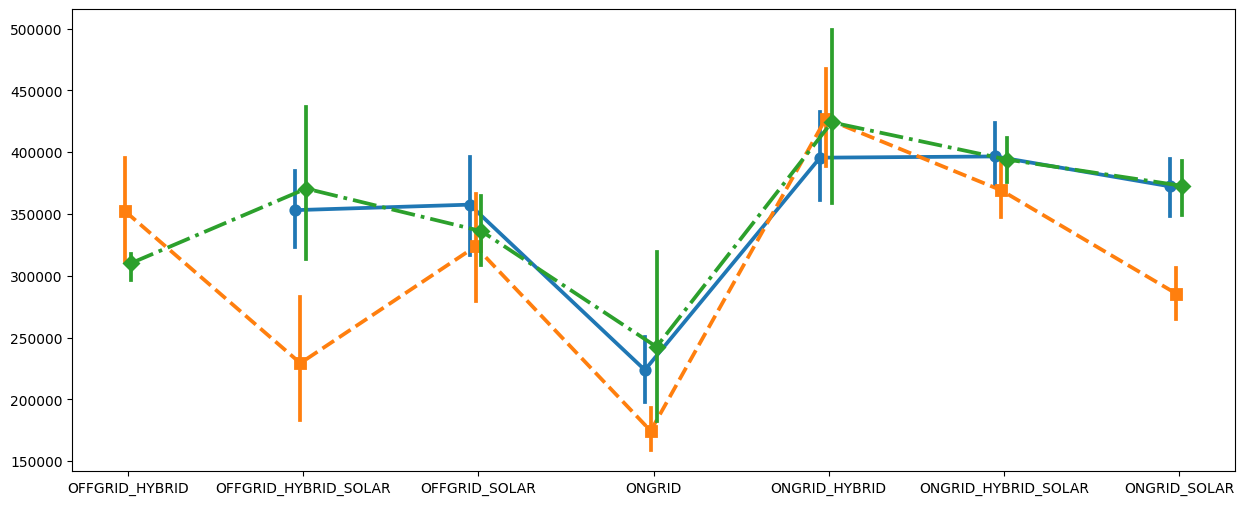

In [576]:
plt.figure(figsize=(15, 6))
df['Vendor'] = df['Vendor'].str.strip()
sns.pointplot(x='Site_Layout', y='Revenue', hue='Vendor', data=df, markers=["o", "s", "D"], linestyles=["-", "--", "-."], dodge=True)

# Customize the plot
plt.title('Interaction Plot: Vendor vs Site Layout on Cost Margin')
plt.xlabel('Site Layout')
plt.ylabel('Cost Margin')
plt.legend(title='Vendor', loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

# performing Welch's ANOVA

In [579]:
import pingouin as pg
def perform_welch_anova(df,variable):
    welch_result = pg.welch_anova(dv='Revenue', between=variable, data=df)
    print(welch_result)

In [580]:
perform_welch_anova(df,'Site_Region')

        Source  ddof1       ddof2         F     p-unc      np2
0  Site_Region     14  774.422371  3.911311  0.000002  0.02321


# performing Games Howell Test

In [581]:
# Perform Games-Howell test
def games_howell(df,variable):
    games_results = pg.pairwise_gameshowell(dv='Revenue', between=variable, data=df)
    effect_sizes = []
    group1_means = []
    group2_means = []
    
    for index, row in games_results.iterrows():
        group1, group2 = row["A"], row["B"]
        data1 = df[df[variable] == group1]["Revenue"].dropna()
        data2 = df[df[variable] == group2]["Revenue"].dropna()
        
        mean1 = np.mean(data1)
        mean2 = np.mean(data2)
        
        std1, std2 = np.std(data1, ddof=1), np.std(data2, ddof=1)
        pooled_std = np.sqrt((std1**2 + std2**2) / 2)
    
        cohen_d = row["diff"] / pooled_std if pooled_std > 0 else np.nan
    
        effect_sizes.append(cohen_d)
        group1_means.append(mean1)
        group2_means.append(mean2)
    
    # Add computed effect sizes to the results DataFrame
    games_results["Cohen_d"] = effect_sizes
    games_results["Group1_Mean"] = group1_means
    games_results["Group2_Mean"] = group2_means
    
    # Sort by absolute Cohen's d
    games_results_sorted = games_results.sort_values(by="Cohen_d", ascending=False, key=abs)
    
    # Display results
    print("\nSorted Games-Howell Results (by Cohen’s d Effect Size):")
    print(games_results_sorted)

In [582]:
games_howell(df,'Site_Region')


Sorted Games-Howell Results (by Cohen’s d Effect Size):
                     A                   B        mean(A)        mean(B)  \
15               Coast       Lower Central  301074.352632  398198.360000   
24               Coast  Upper Central Rift  301074.352632  393227.505495   
26               Coast       Upper Western  301074.352632  382305.147826   
2                  Cbd       Lower Central  314068.379310  398198.360000   
27             Eastern       Lower Central  321881.853846  398198.360000   
..                 ...                 ...            ...            ...   
56  Lower Central Rift       Upper Central  351590.605042  352357.442857   
71       Lower Western          North Rift  362235.333333  361638.968750   
60       Lower Eastern       Lower Western  361635.137725  362235.333333   
58  Lower Central Rift       Upper Eastern  351590.605042  351249.133803   
63       Lower Eastern          North Rift  361635.137725  361638.968750   

            diff            se

# For learning purposes, I will go ahead and compute the non-parametric test using the kruskall wallis test and conduct the Dunn's post hoc analysis just to show how the test would perform if the data violated the assumption  of normality and homogeneuity of variance

# performing Kruskall Wallis test

In [277]:
import scipy.stats as stats

def perform_kruskal_wallis(df,variable):
    unique_groups = df[variable].unique()
    cost_groups = [df[df[variable] == unique_group]['Cost_Margin'] for unique_group in unique_groups]
    stat, p = stats.kruskal(*cost_groups)
    if p < 0.05:
        print(f"Kruskal-Wallis test result: p-value = {p}. There are significant differences between regions.")
    else:
        print(f"Kruskal-Wallis test result: p-value = {p}. There are no significant differences between regions.")

In [278]:
perform_kruskal_wallis(df,'Site_Region')

Kruskal-Wallis test result: p-value = 3.4274170459461865e-06. There are significant differences between regions.


# performing Dun's Test

In [279]:
import scikit_posthocs as sp

def duns_test(df,variable):
    df["Ranked_Cost_Margin"] = stats.rankdata(df["Cost_Margin"])
    # Perform Kruskal-Wallis test (prerequisite for Dunn's test)
    kw_stat, kw_p = stats.kruskal(*(df[df[variable] == group]["Cost_Margin"] for group in df[variable].unique()))
    
    print(f"Kruskal-Wallis Test: H={kw_stat:.3f}, p={kw_p:.5f}")
    dunn_results = sp.posthoc_dunn(df, val_col="Cost_Margin", group_col=variable, p_adjust="bonferroni")
    dunn_df = dunn_results.stack().reset_index()
    dunn_df.columns = ["Group1", "Group2", "P_value"]
    
    effect_sizes = []
    group1_means = []
    group2_means = []
    
    for index, row in dunn_df.iterrows():
        group1, group2 = row["Group1"], row["Group2"]
        data1 = df[df[variable] == group1]["Cost_Margin"].dropna()
        data2 = df[df[variable] == group2]["Cost_Margin"].dropna()
    
        mean1, mean2 = np.mean(data1), np.mean(data2)
        delta = (np.sum(np.array(data1)[:, np.newaxis] > np.array(data2)) - 
             np.sum(np.array(data1)[:, np.newaxis] < np.array(data2))) / (len(data1) * len(data2))
        effect_sizes.append(delta)
        group1_means.append(mean1)
        group2_means.append(mean2)
    
    dunn_df["Cliffs_Delta"] = effect_sizes
    dunn_df["Group1_Mean"] = group1_means
    dunn_df["Group2_Mean"] = group2_means
    dunn_df_sorted = dunn_df.sort_values(by="Cliffs_Delta", ascending=False, key=abs)
    
    print("\nSorted Dunn’s Test Results (by Cliff’s Delta Effect Size):")
    print(dunn_df_sorted)

In [280]:
duns_test(df,'Site_Region')

Kruskal-Wallis Test: H=51.492, p=0.00000

Sorted Dunn’s Test Results (by Cliff’s Delta Effect Size):
                 Group1              Group2   P_value  Cliffs_Delta  \
3                   Cbd       Lower Central  0.000360     -0.273583   
45        Lower Central                 Cbd  0.000360      0.273583   
180  Upper Central Rift                 Cbd  0.011846      0.260042   
12                  Cbd  Upper Central Rift  0.011846     -0.260042   
33              Eastern       Lower Central  0.068911     -0.258402   
..                  ...                 ...       ...           ...   
64   Lower Central Rift  Lower Central Rift  1.000000      0.000000   
48        Lower Central       Lower Central  1.000000      0.000000   
32              Eastern             Eastern  1.000000      0.000000   
16                Coast               Coast  1.000000      0.000000   
224       Upper Western       Upper Western  1.000000      0.000000   

       Group1_Mean    Group2_Mean  
3    24386

# testing significant difference in the rest of the columns

In [393]:
perform_anova(df,'Month')
perform_anova(df,'Vendor')
perform_anova(df,'Site_Layout')

ANOVA result: p-value = 4.463028639782691e-05. There are significant differences between Months
ANOVA result: p-value = 7.269899074462032e-06. There are significant differences between Vendors
ANOVA result: p-value = 1.6165359425373992e-35. There are significant differences between Site_Layouts


# Running regression analysis to check the key drivers of revenue

In [626]:
def regression_analysis(df,group1,group2,metric):
    excluded = ['Site_Name', 'Site_ID', 'Start_date', 'Quarter', 'ID_Month', 'SDS', 'End_date']
    df = df.drop(columns=excluded, errors='ignore')
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
    for col in categorical_cols:
        df[col] = df[col].astype('category')
    df_dummy = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    df_dummy.columns = df_dummy.columns.str.replace(' ', '_')
    all_dummy_cols = [col for col in df_dummy.columns if col != metric]
    
    # Identify specific dummy variable groups for interaction
    group1_cols = [col for col in df_dummy.columns if group1 in col]
    group2_cols = [col for col in df_dummy.columns if group2 in col]

    if group1_cols and group2_cols:
        # Main effects: Include all categorical dummy variables
        main_effects = " + ".join(all_dummy_cols)

        # Interaction terms: Only between Site_Region and Vendor
        interaction_terms = " + ".join([f"{r}:{v}" for r in group1_cols for v in group2_cols])

        # Final regression formula
        model_formula = f"{metric} ~ {main_effects} + {interaction_terms}"
        
        # Fit the model
        model = smf.ols(model_formula, data=df_dummy).fit()

        # Save results to CSV using pandas
        summary_df = pd.DataFrame(model.summary().tables[1].data)
        summary_df.to_csv("regression_results.csv", index=False, header=False)

        print(model.summary())
    else:
        raise ValueError("Could not find appropriate dummy variables for regression")

In [627]:
df6 = df.drop(['Cost_Margin'],axis=1)
regression_analysis(df6,'Site_Region','Vendor','Revenue')

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     48.94
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:38:56   Log-Likelihood:                -29588.
No. Observations:                2253   AIC:                         5.929e+04
Df Residuals:                    2197   BIC:                         5.961e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

# Conclusion
# The analysis shows that operation/energy-related factors like power consumption, Site_Region, Site_Layout and month account for about 58% of the variation in the revenue generated. However, the remaining 42% appears to be influenced by other factors not captured in the current data. These could include things like the type of customer (tier 1, tier 2, tier 3), different contract terms, billing inaccuracies, or even additional charges like penalties. To draw more accurate conclusions, we would either need access to more detailed billing data or ensure that the revenue figures used reflect only energy-related income, excluding any unrelated charges.

In [625]:
import statsmodels.formula.api as smf

# Formula: dependent variable ~ independent variables (including interaction terms)
# We include interaction between Site_Region, Vendor, and Month

formula = 'Revenue ~ +  Total_Consumers_Load_KWH  + Site_Region + Site_Layout + Month'

# Fit the model
model2 = smf.ols(formula=formula, data=df).fit()

# Get the summary of the results 
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     103.4
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:38:40   Log-Likelihood:                -29671.
No. Observations:                2253   AIC:                         5.939e+04
Df Residuals:                    2229   BIC:                         5.953e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

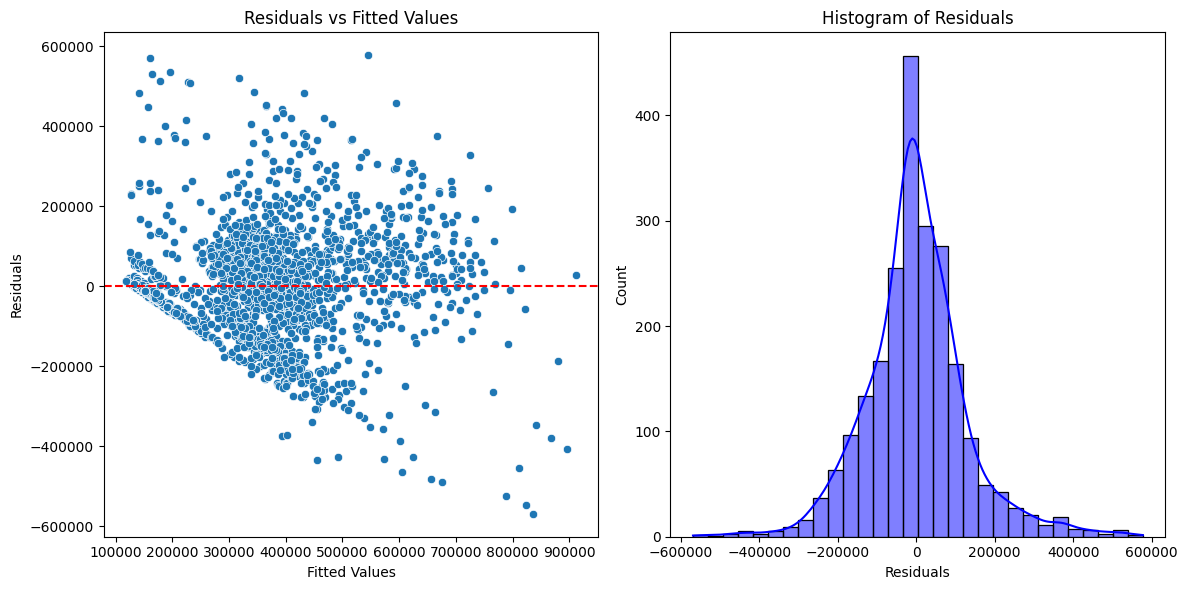

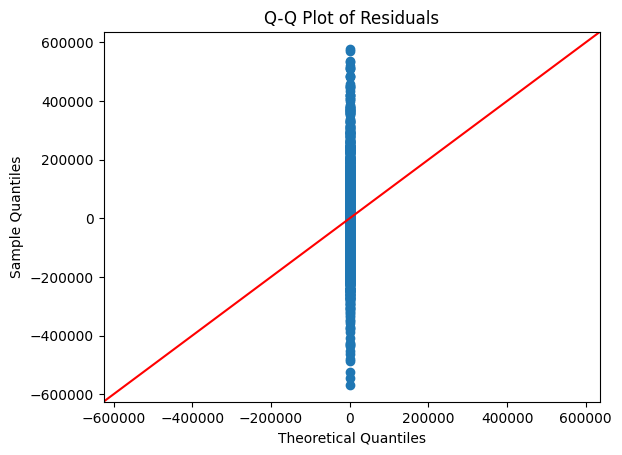

In [523]:
# Extract residuals from the fitted model
residuals = model.resid

# Plotting the residuals
plt.figure(figsize=(12, 6))

# 1. Residuals vs Fitted Values plot (check randomness)
plt.subplot(1, 2, 1)
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

# 2. Histogram of residuals (check distribution)
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")

plt.tight_layout()
plt.show()

# 3. Q-Q Plot to check for normality of residuals
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()